# Twitter API using tweepy 

In [26]:
import pandas as pd 
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import sys
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [22]:
# tokens
c_key = 'sA9mQvehoXxf0P20neDzagpkM'
c_secret = 'nTI78NOh8Ic5h7MCBHl1mGhfjps0UjH5cPLftBLq9fihTYerMq'
a_token = '1295111663046340614-lnaPCm0oFVGJOFdhExMk2t72nELCQh'
a_secret = '8x9hk37UD25ctpo4dACfKTmW8xKVutJYJrSwOmwunLHfB'

# tweepy OAuth authenticator 
auth = tweepy.OAuthHandler(c_key, c_secret)
auth.set_access_token(a_token, a_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

posts = api.user_timeline(screen_name='AMCTheatres', count=100, lang='en', tweet_mode='extended')

print('Five recent tweets from AMCTheatres: \n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i+=1

Five recent tweets from AMCTheatres: 

1) Experience AMC’s comprehensive health and sanitation program: AMC Safe &amp; Clean. Full details: https://t.co/xVA4ndQkGU https://t.co/yDOdway0Rt

2) #NOMADLAND in theaters December 4, 2020
a film by Chloé Zhao starring Frances McDormand @nomadlandfilm https://t.co/oQHpG7VgTu

3) Your choice of regular-size perfectly popcorn, fountain drink, or KidsPack is just $5 through 10/31 at #AMCTheatres! See showtimes:  https://t.co/zwevdDB9ok https://t.co/FmVAAq4KNj

4) BEAUTY AND THE BEAST is back on the big screen! Tickets are just 15¢ on 8/20 and $5 starting 8/21. #AMCStubs members get double points- get tickets now! https://t.co/FjlBs92lRR https://t.co/CsaJh0enuj

5) Grab some recent releases in our summer blowout sale at #AMCTheatresOnDemand! Browse movies available to buy for $7.99 or less: https://t.co/DKPKMFWCUG https://t.co/zAbPsY0tJc



In [23]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [24]:
df.head()

,Tweets
0,Experience AMC’s comprehensive health and sani...
1,"#NOMADLAND in theaters December 4, 2020\na fil..."
2,"Your choice of regular-size perfectly popcorn,..."
3,BEAUTY AND THE BEAST is back on the big screen...
4,Grab some recent releases in our summer blowou...


In [27]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

df['Tweets'] = df['Tweets'].apply(clean_text)

In [28]:
df['Tweets'].head()

0    Experience AMC’s comprehensive health and sani...
1    NOMADLAND in theaters December 4, 2020\na film...
2    Your choice of regular-size perfectly popcorn,...
3    BEAUTY AND THE BEAST is back on the big screen...
4    Grab some recent releases in our summer blowou...
Name: Tweets, dtype: object

In [30]:
# subjectivity 
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

# polarity
def get_polar(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(get_subj)
df['Polarity'] = df['Tweets'].apply(get_polar)

df.head()

,Tweets,Subjectivity,Polarity
0,Experience AMC’s comprehensive health and sani...,0.583333,0.405556
1,"NOMADLAND in theaters December 4, 2020\na film...",0.000000,0.000000
2,"Your choice of regular-size perfectly popcorn,...",1.000000,1.000000
3,BEAUTY AND THE BEAST is back on the big screen...,0.050000,0.000000
4,Grab some recent releases in our summer blowou...,0.238889,0.077778


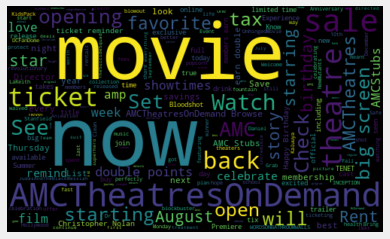

In [35]:
# word cloud
words = ' '.join([twt for twt in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=21, max_font_size = 110).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
search_words = input('Enter a keyword or hashtag to search: ')
no_of_search = int(input('How many tweets?'))

tweets = tweepy.Cursor(api.search, q=search_words, lang='English').items(no_of_search)
new_list = []
for tweet in tweets:
    new_list.append(tweet.text)
#     anaylsis = TextBlob(tweet.text)
new_list

Enter a keyword or hashtag to search: bitcoin
How many tweets?1


[]